## Importing The Necessary Libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings('ignore')

df_original = pd.read_csv(r'C:\Users\Mohamed Fawzi\Desktop\Data Analysis Projects\EVs Market Analysis\EVs_Market.csv')

df = df_original.copy()

df.head(2)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10


## Data Cleaning:

##### - Handling missing values

In [2]:
# check if there are missing values in the dataset
df.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [3]:
# dropping missing values from the dataset
df = df.dropna()

## Exploratory Data Analysis (EDA):
- #### **Points To Explore:**

     - **5 -** EV Range:
     

-  **Note:** 
   -  *In 2024, 7072 EVs ara registered which suggests that the dataset for 2024 is incomplete.* 

In [4]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

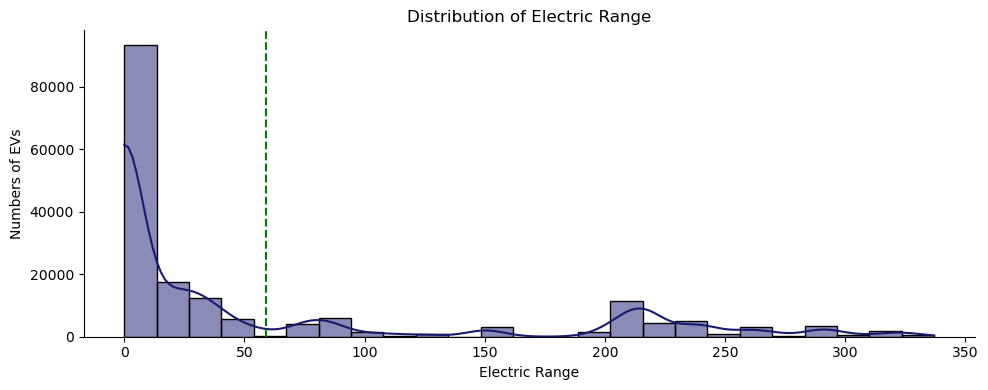

In [5]:
plt.figure(figsize=(10, 4))

# Plottin The Distribution of Electric Range
sns.histplot(df['Electric Range'], bins=25, kde=True, color='midnightblue')

plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range')
plt.ylabel('Numbers of EVs')

plt.axvline(df['Electric Range'].mean(), color='green', linestyle='--', label='Mean')

sns.despine()
plt.tight_layout()
plt.show()


In [6]:
top_5_make = df['Make'].value_counts().head(5).index

In [7]:
df_top5_makes = df[df['Make'].isin(top_5_make)]

#df_top5_makes

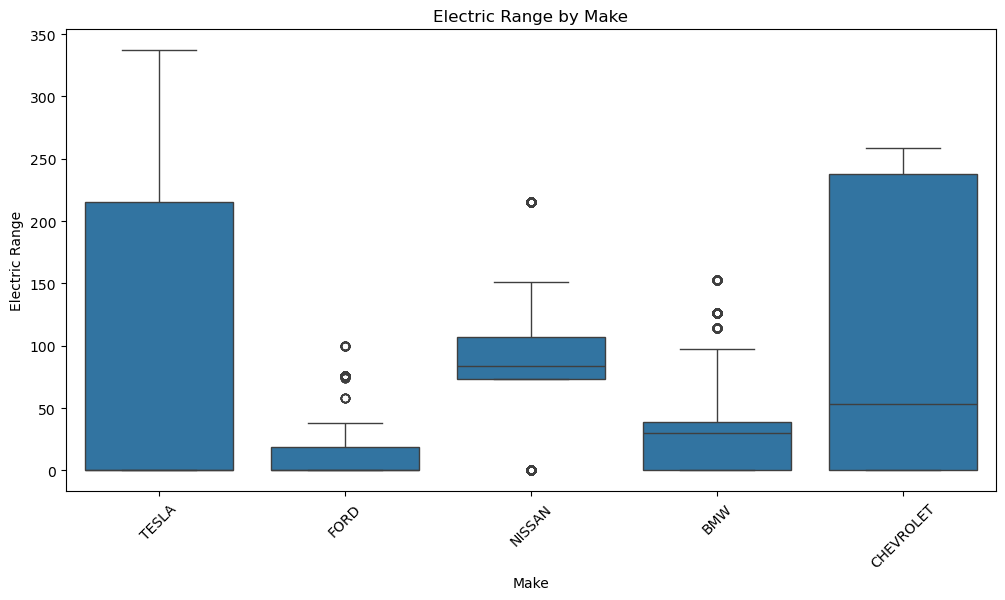

In [8]:
# Boxplot by Make
plt.figure(figsize=(12, 6))
sns.boxplot(x='Make', y='Electric Range', data=df_top5_makes)
plt.title('Electric Range by Make')
plt.xticks(rotation=45)
plt.show()


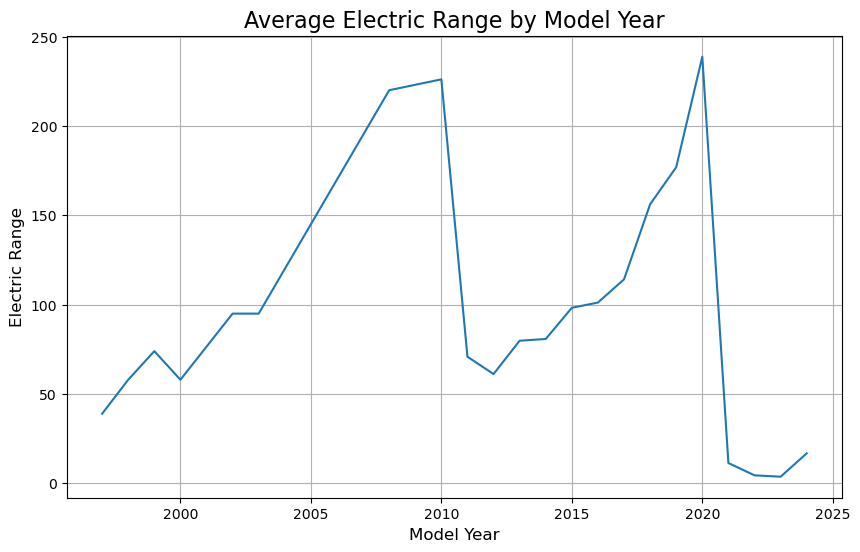

In [9]:

# Group data by Model Year and calculate the average Electric Range
range_by_year = df.groupby('Model Year', as_index=False)['Electric Range'].mean()

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=range_by_year, x='Model Year', y='Electric Range', marker='')

# Add title and labels
plt.title('Average Electric Range by Model Year', fontsize=16)
plt.xlabel('Model Year', fontsize=12)
plt.ylabel('Electric Range', fontsize=12)
plt.grid(True)
plt.show()


In [12]:

# Compare BEVs vs PHEVs
bevs = df[df['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']
phevs = df[df['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)']

print("Average range of BEVs:", bevs['Electric Range'].mean())
print("Average range of PHEVs:", phevs['Electric Range'].mean())


Average range of BEVs: 66.59453604611831
Average range of PHEVs: 30.810699268026788


In [12]:
from statsmodels.nonparametric.smoothers_lowess import lowess

# Group data by Model Year and calculate the average Electric Range
range_by_year = df.groupby('Model Year', as_index=False)['Electric Range'].mean()

# Apply Lowess Smoothing
smoothed = lowess(range_by_year['Electric Range'], range_by_year['Model Year'], frac=0.3)

# Plot the smoothed line
plt.figure(figsize=(10, 6))
sns.lineplot(x=range_by_year['Model Year'], y=smoothed[:, 1], marker='o', label='Smoothed Curve')

# Add title and labels
plt.title('Smoothed Average Electric Range by Model Year', fontsize=16)
plt.xlabel('Model Year', fontsize=12)
plt.ylabel('Electric Range', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

ModuleNotFoundError: No module named 'statsmodels'